In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os

In [3]:
pip install geopandas

     |████████████████████████████████| 962 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 14.7 MB 57.6 MB/s eta 0:00:01B/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 55.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
fp = "res/pan_admbnda_adm2_2020.shp"
data = gpd.read_file(fp)

In [6]:
data.head()

,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,ADM2_ES,ADM2_PCODE,geometry
0,Panamá,PA,Bocas del Toro,PA01,Bocas del Toro,PA0101,"MULTIPOLYGON (((-82.18792 9.14931, -82.18792 9..."
1,Panamá,PA,Bocas del Toro,PA01,Changuinola,PA0102,"MULTIPOLYGON (((-82.32397 9.22070, -82.32375 9..."
2,Panamá,PA,Bocas del Toro,PA01,Chiriquí Grande,PA0103,"MULTIPOLYGON (((-82.08041 8.93542, -82.08041 8..."
3,Panamá,PA,Chiriquí,PA02,Alanje,PA0201,"POLYGON ((-82.66179 8.45536, -82.66054 8.45515..."
4,Panamá,PA,Chiriquí,PA02,Barú,PA0202,"MULTIPOLYGON (((-82.88125 8.01986, -82.88125 8..."


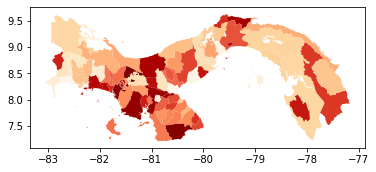

In [10]:
plot = data.plot(column='ADM2_ES', cmap='OrRd')

fig = plot.get_figure()

In [9]:
pip install descartes

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
df = pd.read_csv('res/data.csv')

df.head()

,CORREGIMIENTO,DISTRITO,Sem 11,Sem 12,Sem 13,Sem 14,Sem 15,Sem 16,Sem 17,Sem 18,Sem 19,Sem 20,Sem 21,Sem 22,Sem 23,Sem 24
0,24 DE diciembre,PANAMA,0,1,16,40,90,143,207,247,286,336,368,468,595,725
1,AGUA FRIA,SANTA FE,0,0,0,0,0,1,1,1,2,2,2,2,2,2
2,AGUADULCE,AGUADULCE,0,0,2,4,4,4,6,6,7,8,8,8,12,13
3,AILIGANDI,GUNA YALA,0,0,1,3,11,18,50,94,100,101,101,101,101,101
4,ALANJE,ALANJE,0,0,0,2,2,2,2,2,2,2,2,4,7,7


In [12]:
df["CORREGIMIENTO"]=df["CORREGIMIENTO"].str.lower()
df["DISTRITO"]=df["DISTRITO"].str.lower()

In [13]:
data["ADM2_ES"]=data["ADM2_ES"].str.lower()

In [14]:
data.head()

,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,ADM2_ES,ADM2_PCODE,geometry
0,Panamá,PA,Bocas del Toro,PA01,bocas del toro,PA0101,"MULTIPOLYGON (((-82.18792 9.14931, -82.18792 9..."
1,Panamá,PA,Bocas del Toro,PA01,changuinola,PA0102,"MULTIPOLYGON (((-82.32397 9.22070, -82.32375 9..."
2,Panamá,PA,Bocas del Toro,PA01,chiriquí grande,PA0103,"MULTIPOLYGON (((-82.08041 8.93542, -82.08041 8..."
3,Panamá,PA,Chiriquí,PA02,alanje,PA0201,"POLYGON ((-82.66179 8.45536, -82.66054 8.45515..."
4,Panamá,PA,Chiriquí,PA02,barú,PA0202,"MULTIPOLYGON (((-82.88125 8.01986, -82.88125 8..."


In [15]:
len(data)

76

In [16]:
len(df)

314

In [17]:
df.rename(columns={df.columns[0]:'ADM3_ES'}, inplace=True)
df.rename(columns={df.columns[1]:'ADM2_ES'}, inplace=True)

In [18]:
df.head()

,ADM3_ES,ADM2_ES,Sem 11,Sem 12,Sem 13,Sem 14,Sem 15,Sem 16,Sem 17,Sem 18,Sem 19,Sem 20,Sem 21,Sem 22,Sem 23,Sem 24
0,24 de diciembre,panama,0,1,16,40,90,143,207,247,286,336,368,468,595,725
1,agua fria,santa fe,0,0,0,0,0,1,1,1,2,2,2,2,2,2
2,aguadulce,aguadulce,0,0,2,4,4,4,6,6,7,8,8,8,12,13
3,ailigandi,guna yala,0,0,1,3,11,18,50,94,100,101,101,101,101,101
4,alanje,alanje,0,0,0,2,2,2,2,2,2,2,2,4,7,7


In [19]:
data['ADM2_ES']=data['ADM2_ES'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [44]:
df_grouped=df.groupby('ADM2_ES')
grouped_and_summed = df_grouped.sum()
df_dist= grouped_and_summed.reset_index()

In [76]:
df_dist

,ADM2_ES,Sem 11,Sem 12,Sem 13,Sem 14,Sem 15,Sem 16,Sem 17,Sem 18,Sem 19,Sem 20,Sem 21,Sem 22,Sem 23,Sem 24
0,aguadulce,0,1,3,5,9,9,13,16,18,19,19,20,32,41
1,alanje,0,0,1,4,5,7,7,7,17,95,172,189,225,241
2,anton,0,0,5,9,13,13,14,14,16,17,22,24,26,27
3,arraijan,4,29,119,277,509,662,870,1096,1269,1413,1567,1911,2274,2728
4,atalaya,0,1,4,9,18,21,31,36,37,46,48,57,60,70
5,baru,0,0,0,1,3,3,3,3,3,4,6,12,43,85
6,besiko,0,0,0,0,0,0,0,1,1,1,3,6,10,10
7,bocas del toro,0,0,0,0,0,0,0,0,0,0,0,2,14,23
8,boqueron,0,1,1,3,5,8,8,8,10,10,10,12,12,23
9,boquete,0,0,2,2,3,7,17,17,17,17,17,17,17,18


In [57]:
df_merged=pd.merge(data, df_dist, on='ADM2_ES', how='left').fillna('0')

In [58]:
for i in range(11,25):
    sem='Sem '+str(i)
    df_merged[sem]= pd.to_numeric(df_merged[sem])


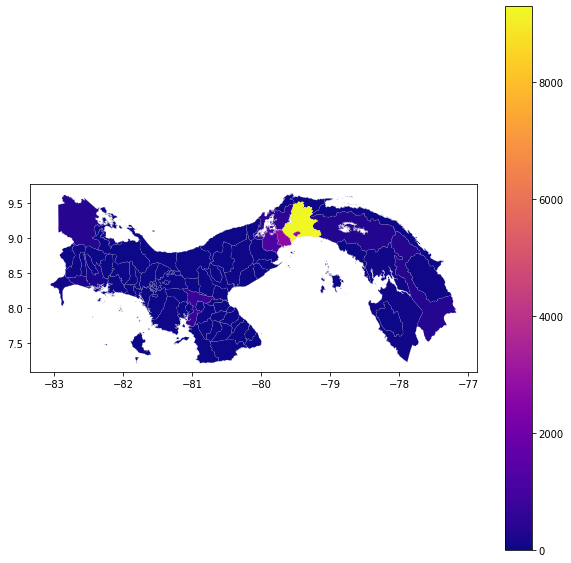

In [83]:
vmin,vmax=0,9300
fig = df_merged.plot(column='Sem 24', cmap='plasma', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 11')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 12')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 13')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 14')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 15')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 16')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 17')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 18')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 19')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 20')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 21')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 22')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 23')

(-83.34402542114259, -76.87939376831042, 7.080109119415235, 9.76961088180549)

Text(0.5, 1.0, 'Casos Covid por Distritos')

Text(0.1, 0.225, 'Sem 24')

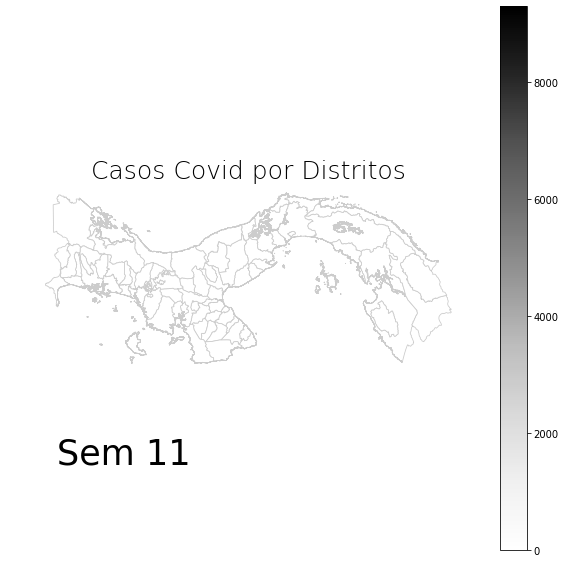

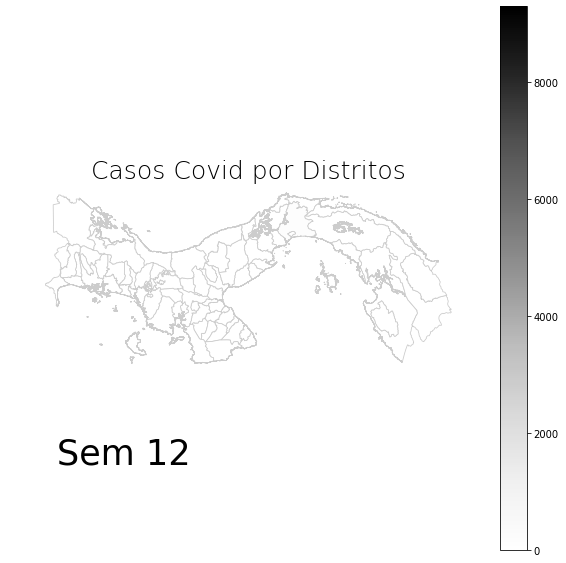

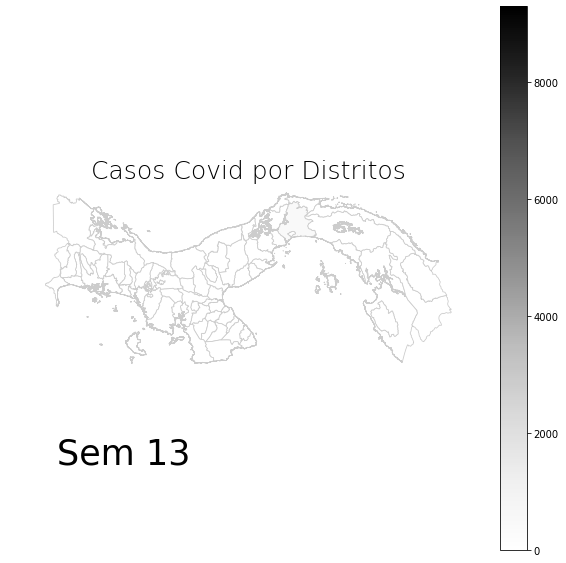

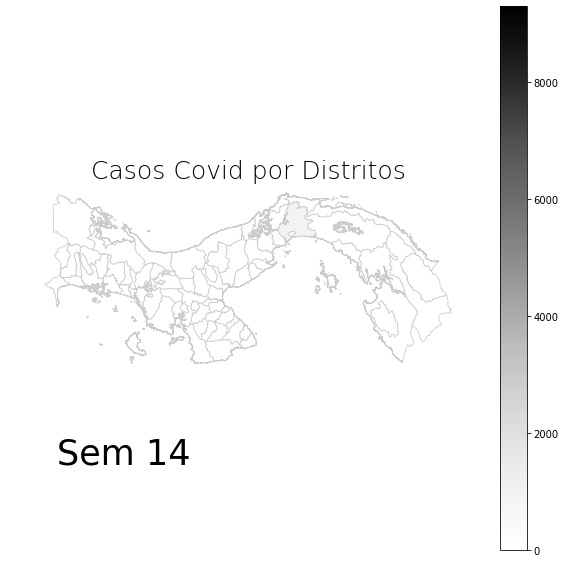

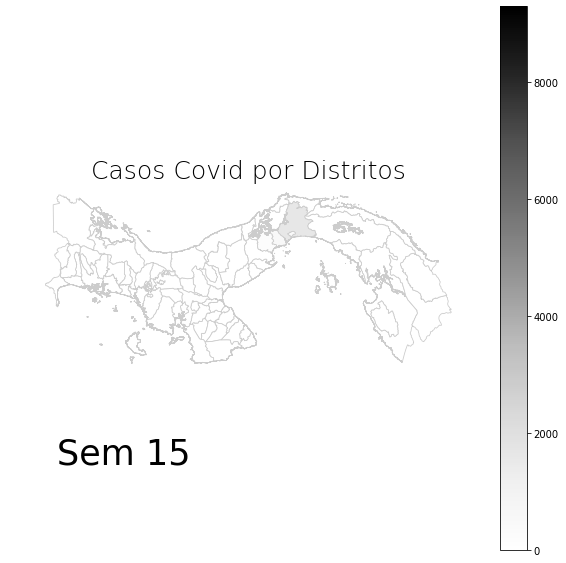

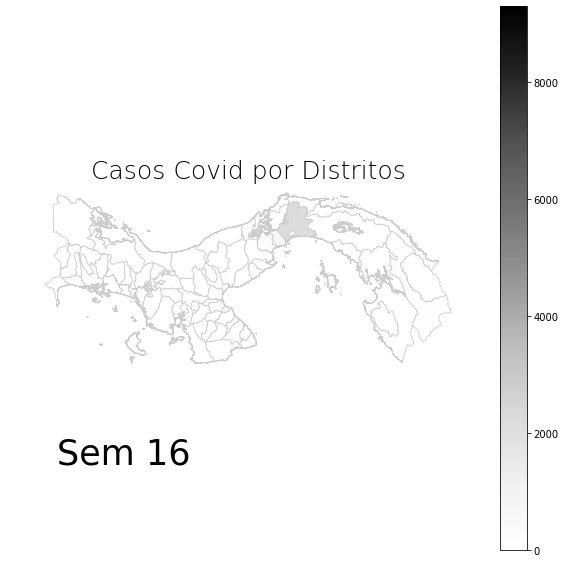

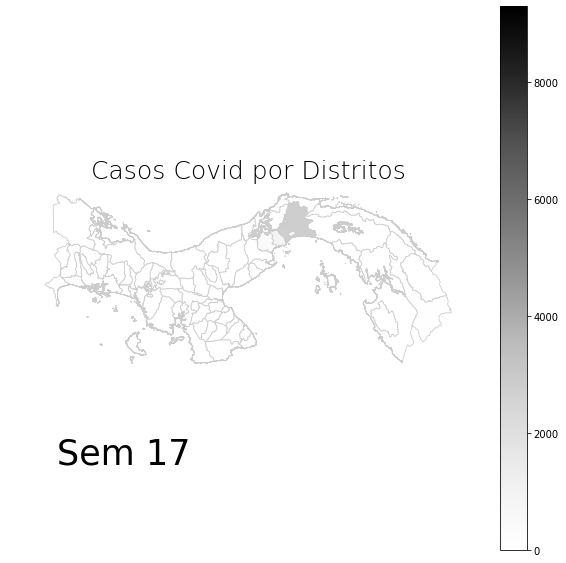

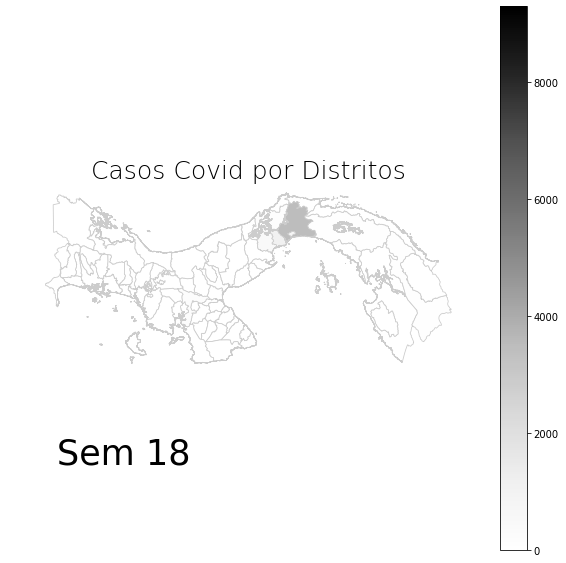

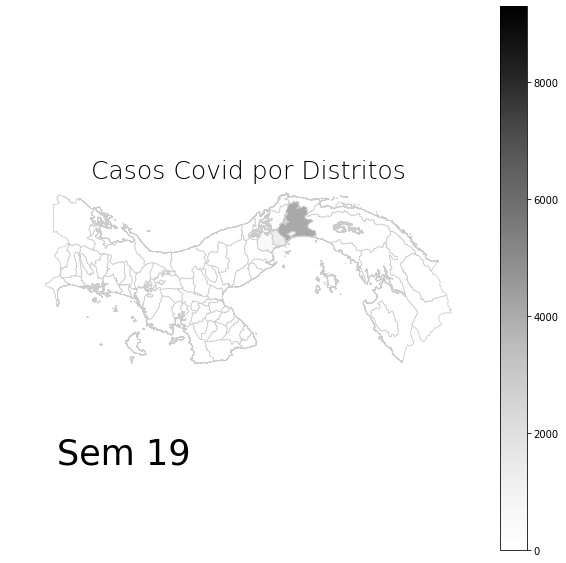

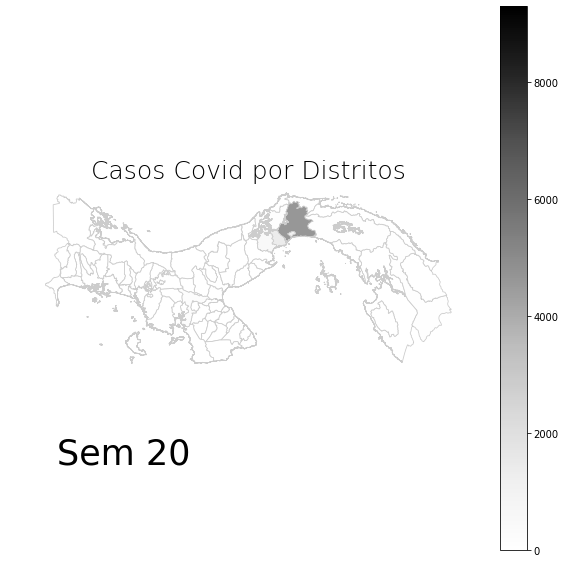

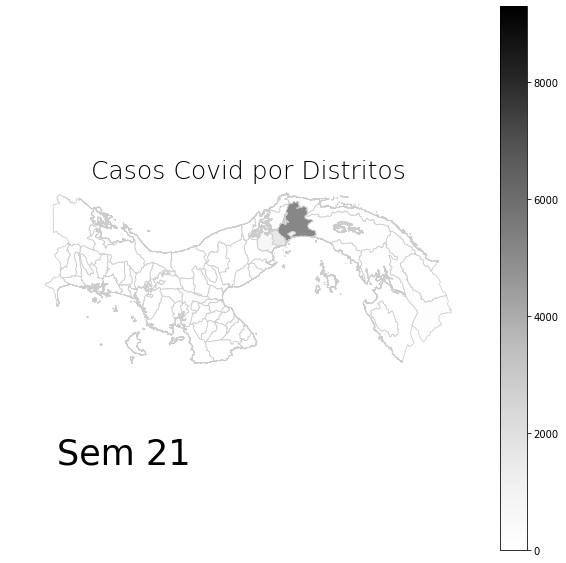

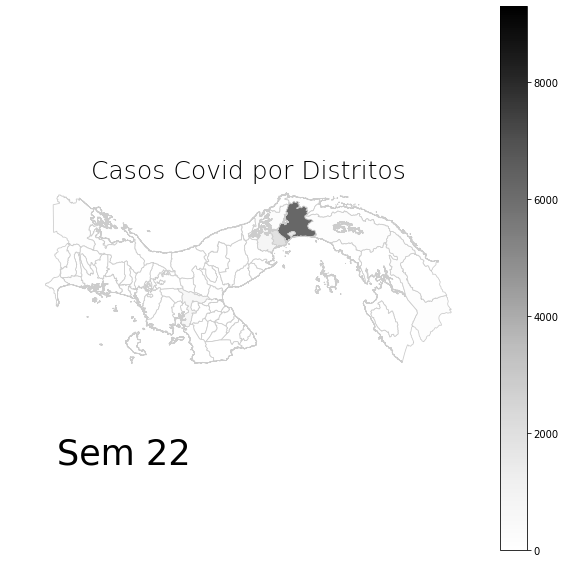

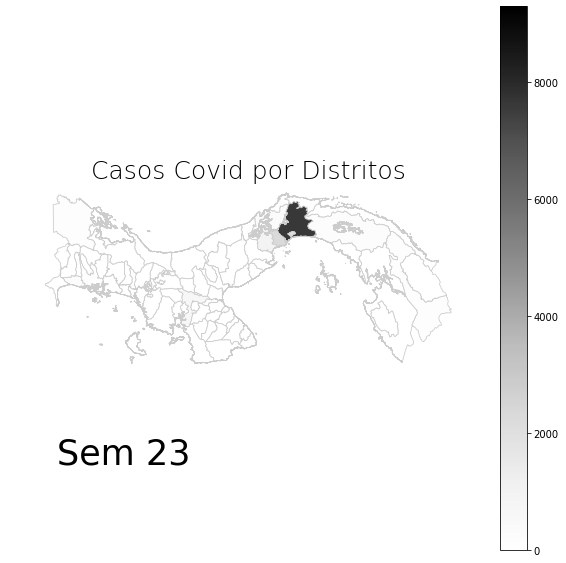

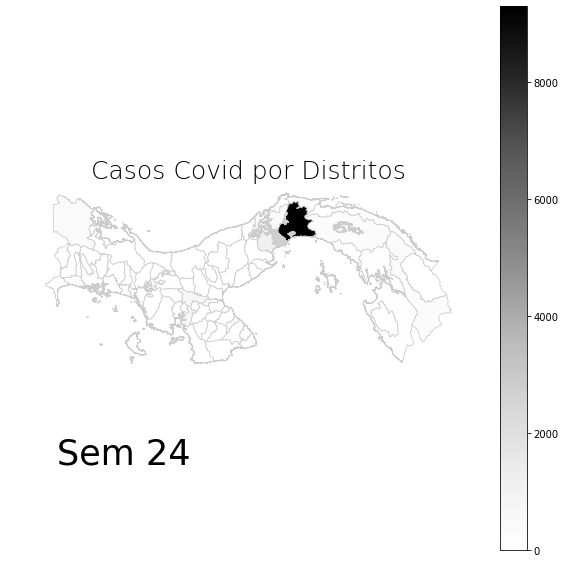

In [87]:
output_path = 'output/maps2'

weeks = ['Sem 11','Sem 12','Sem 13','Sem 14','Sem 15','Sem 16','Sem 17','Sem 18','Sem 19','Sem 20','Sem 21','Sem 22','Sem 23','Sem 24']

vmin, vmax = 0, 9300

for week in weeks:
    
    # create map
    fig = df_merged.plot(column=week, cmap='Greys', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)) # UDPATE: added plt.Normalize to keep the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Casos Covid por Distritos', 
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # create an annotation for the year
    
    
    # position the annotation to the bottom left
    fig.annotate(week,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, week+'_covid.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)